Embedding = HugguingFaceEmbedding,
text splitter = RecursiveTextSplitter,
vector_store = ChromaDB

In [272]:
import pandas as pd
import matplotlib.pyplot as plt


In [273]:
data_1 = pd.read_csv('./Results/LLM-testing/Medium-articles-training/chroma/result.csv')
# data_2 = pd.read_csv('./Results/LLM-testing/result-4/result-4.csv')

total_questions = len(data_1)

Text(0.5, 1.0, 'faithfulness (llama3:8b)')

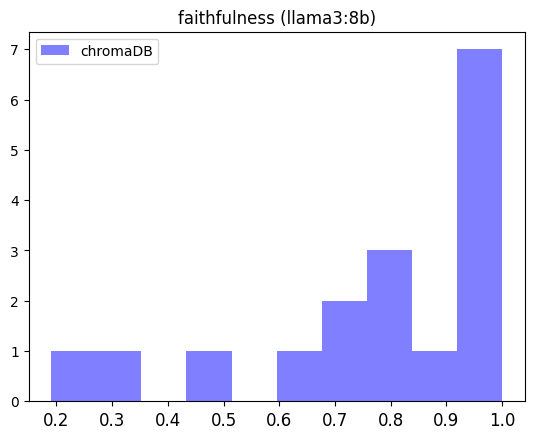

In [274]:
plt.hist(data_1['faithfulness'], fc=(0,0,1,0.5))
# plt.hist(data_2['faithfulness'],fc=(1,0,0,0.5))
plt.legend(["chromaDB","Qdrant"])
plt.title("faithfulness (llama3:8b)")

Text(0.5, 1.0, 'answer_correctness (llama3:8b)')

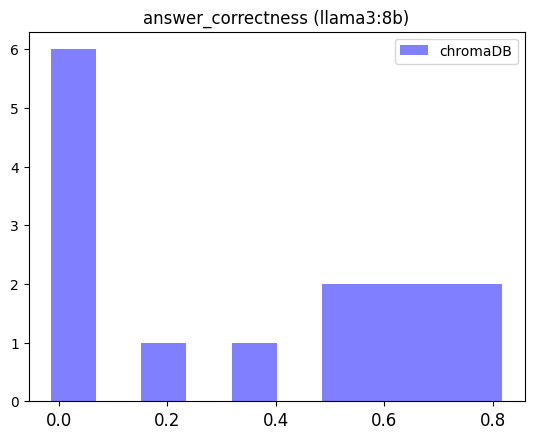

In [275]:
plt.hist(data_1['answer_correctness'], fc=(0,0,1,0.5))
# plt.hist(data_2['answer_correctness'],fc=(1,0,0,0.5))
plt.legend(["chromaDB","Qdrant"])
plt.title("answer_correctness (llama3:8b)")

Text(0.5, 1.0, 'answer_relevancy (llama3:8b)')

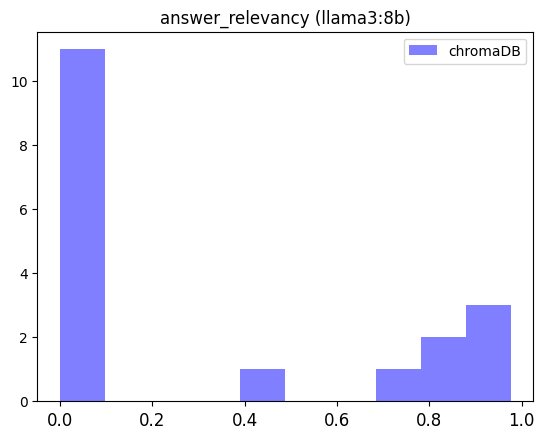

In [276]:
plt.hist(data_1['answer_relevancy'], fc=(0,0,1,0.5))
# plt.hist(data_2['answer_relevancy'],fc=(1,0,0,0.5))
plt.legend(["chromaDB","Qdrant"])
plt.title("answer_relevancy (llama3:8b)")

In [277]:
# data_1_non_neg_ans = data_1[~data_1['answer'].str.contains("I don't have an answer", case=False, na=False)]
# questions_answered = len(data_1_non_neg_ans)
# average_answer_relevancy = data_1_non_neg_ans['answer_relevancy'].mean()
# data_1_non_neg_ans = data_1_non_neg_ans.sort_values(by='question')
# plt.barh(data_1_non_neg_ans['question'] , data_1_non_neg_ans['answer_relevancy'], fc=(0,0,1,0.5))
# plt.xticks(rotation=90)

# stats_text = (
#     f"Total questions: {total_questions}\n"
#     f"Questions answered: {questions_answered}\n"
#     f"Average answer relevancy: {average_answer_relevancy:.2f}"
# )
# plt.gca().text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# plt.legend(["llama3:8b"])
# plt.title("Answer Relevancy when answer is non negative")

Text(0.5, 1.0, 'Answer Relevancy when ground_truth is non negative')

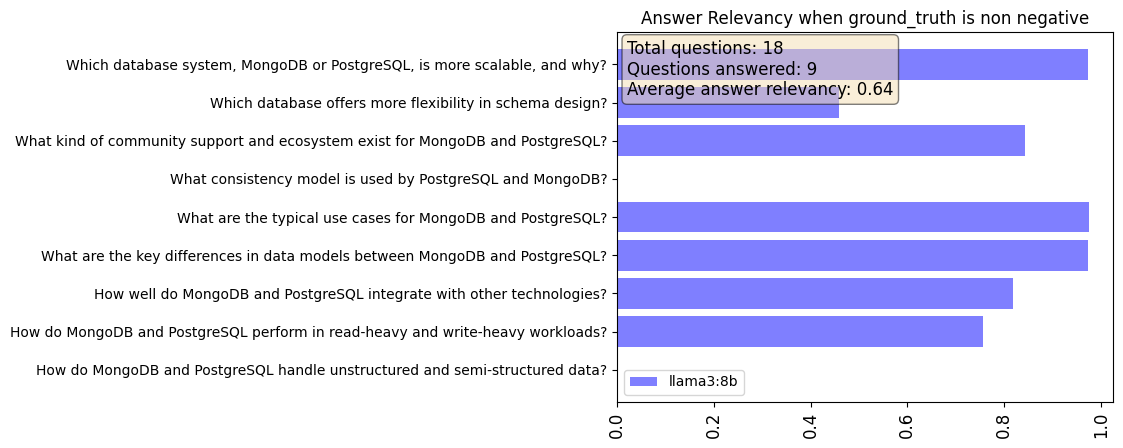

In [278]:
data_1_non_neg_gt = data_1[~data_1['ground_truth'].str.contains("I don't have an answer", case=False, na=False)]
questions_answered = len(data_1_non_neg_gt)
average_answer_relevancy = data_1_non_neg_gt['answer_relevancy'].mean()
data_1_non_neg_gt = data_1_non_neg_gt.sort_values(by='question')
plt.barh(data_1_non_neg_gt['question'] , data_1_non_neg_gt['answer_relevancy'], fc=(0,0,1,0.5))
plt.xticks(rotation=90)

stats_text = (
    f"Total questions: {total_questions}\n"
    f"Questions answered: {questions_answered}\n"
    f"Average answer relevancy: {average_answer_relevancy:.2f}"
)
plt.gca().text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend(["llama3:8b"])
plt.title("Answer Relevancy when ground_truth is non negative")

<BarContainer object of 1 artists>

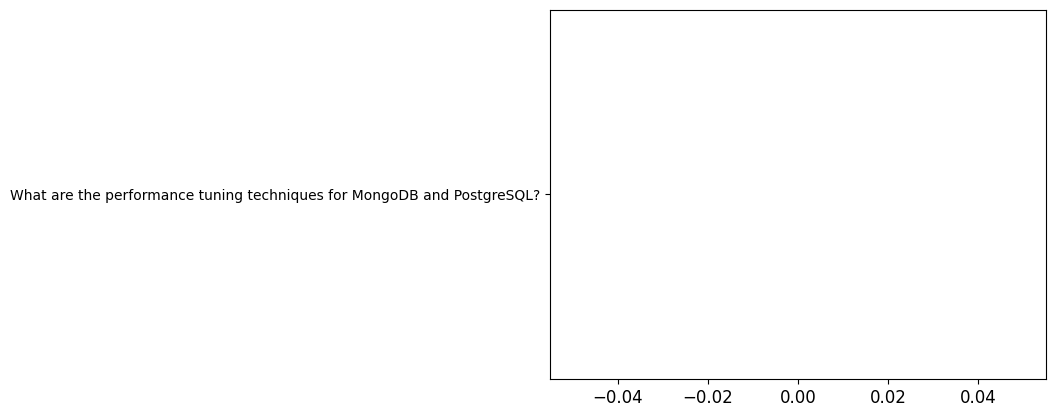

In [279]:
# Filter to keep rows where the ground_truth column contains "I don't have an answer"
fp_candidates = data_1[data_1['ground_truth'].str.contains("I don't have an answer", case=False, na=False)]

# Further filter to get rows where answer does not contain "I don't have an answer"
fp = fp_candidates[~fp_candidates['answer'].str.contains("I don't have an answer", case=False, na=False)]

# Display the False Positives (questions where ground_truth says "I don't have an answer" but the answer has some content)
plt.barh(fp['question'] , fp['answer_relevancy'], fc=(0,0,1,0.5))